## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sem
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
combined_df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
print(f"The number of lines is {len(combined_df)}.")
print(f"The number of unique mice in the study is {combined_df['Mouse ID'].nunique()}.")

The number of lines is 1893.
The number of unique mice in the study is 249.


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# This will give the duplicate row, excluding the first instance.
# Get all of the data for that mouse ID
duplicates = combined_df[combined_df.duplicated()]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop(combined_df.index[909])
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice in the clean DataFrame.
print(f"The number of lines is {len(clean_df)}.")
print(f"The number of unique mice in the study is {clean_df['Mouse ID'].nunique()}.")

The number of lines is 1892.
The number of unique mice in the study is 249.


## Summary Statistics

In [6]:
# Calculate the mean, median, variance, standard deviation and standard error of the tumor volume for each drug regimen
# Group the data by Drug Regimen
drug_group = clean_df.groupby("Drug Regimen")

# Calculate the mean of the tumor volume and store into a variable
drug_mean = drug_group['Tumor Volume (mm3)'].mean()

# Calculate the median of the tumor volume and store into a variable
drug_median = drug_group['Tumor Volume (mm3)'].median()

# Calculate the variance of the tumor volume and store into a variable
drug_var = drug_group['Tumor Volume (mm3)'].var()

# Calculate the standard deviation of the tumor volume and store into a variable
drug_stdev = drug_group['Tumor Volume (mm3)'].std()

# Calculate the standard error of the tumor volume and store into a variable
drug_sem = drug_group['Tumor Volume (mm3)'].sem()

In [7]:
# Generate a summary statistics table with the mean, median, variance, standard deviation and standard error for each drug regimen
summary_stats = pd.DataFrame({"Mean": drug_mean,
                                      "Median": drug_median,
                                      "Variance": drug_var,
                                      "Standard Deviation": drug_stdev,
                                      "Standard Error": drug_sem
                                     })
summary_stats

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_agg = drug_group.agg({"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']})
summary_stats_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.368318  50.909965  42.278090  6.502160  0.514041
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

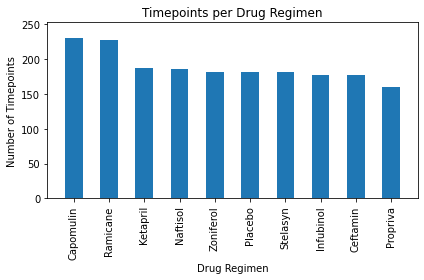

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# First create a DataFrame showing the number of timepoints for each drug regimen
drug_points = pd.value_counts(clean_df['Drug Regimen'])

# Create a bar chart using Pandas Plot
drug_points.plot(kind="bar")
plt.title("Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.xlim(-0.75, len(drug_points)-.25)
plt.ylim(0, max(drug_points)*1.10)
plt.tight_layout()
plt.show()

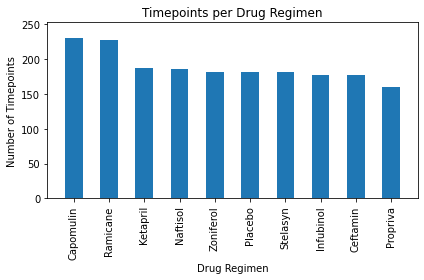

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# First define the x-axis and y-axis data sets
x_axis = clean_df['Drug Regimen'].value_counts().index
y_axis = clean_df['Drug Regimen'].value_counts()

# Plot the bar chart using Matplotlib
plt.bar(x_axis, y_axis, align="center", width=0.5)
plt.xticks(rotation=90)
plt.title("Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.xlim(-0.75, len(drug_points)-.25)
plt.ylim(0, max(drug_points)*1.10)
plt.tight_layout()
plt.show()

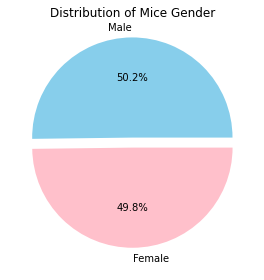

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# First create a DataFrame showing the number of male and female mice in the drug study
gender_count = pd.value_counts(mouse_metadata['Sex'])

# Create a pie chart using Pandas Plot
explode = (0.1,0 )
color = ['skyblue', 'pink']

gender_count.plot(kind="pie", explode=explode, colors=color, autopct="%1.1f%%")
plt.title("Distribution of Mice Gender")
plt.ylabel('')
plt.tight_layout()
plt.show()


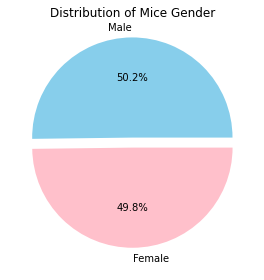

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# First define the data set and labels
labels = mouse_metadata['Sex'].value_counts().index
data = mouse_metadata['Sex'].value_counts()

# Plot the bar chart using Matplotlib
explode = (0.1, 0)
color = ['skyblue', 'pink']

plt.pie(data, labels=labels, explode=explode, colors=color, autopct="%1.1f%%")
plt.title("Distribution of Mice Gender")
plt.tight_layout()
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# DELETE WHEN DONE
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_max_timepoint = clean_df.groupby(['Mouse ID']).max('Timepoint')
mouse_max_timepoint = mouse_max_timepoint.drop(columns=['Age_months', 'Weight (g)', 'Tumor Volume (mm3)', 'Metastatic Sites'])
mouse_max_timepoint = mouse_max_timepoint.reset_index()
mouse_max_timepoint.head()

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30


In [15]:
# Merge the tumor volume data for the max timepoint for each mouse
tumor_size = mouse_max_timepoint.merge(clean_df, left_on=['Mouse ID', 'Timepoint'], right_on=['Mouse ID', 'Timepoint'], how='left')
tumor_size = tumor_size.drop(columns=['Sex', 'Age_months', 'Weight (g)', 'Metastatic Sites'])
tumor_size.head()

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
0,a203,45,Infubinol,67.973419
1,a251,45,Infubinol,65.525743
2,a262,45,Placebo,70.717621
3,a275,45,Ceftamin,62.999356
4,a366,30,Stelasyn,63.440686


In [16]:
# Put the treatments for focus into a list
filter_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter the full DataFrame for only those rows that contain the drug treatment for focus
tumor_size_filter = tumor_size[tumor_size['Drug Regimen'].isin(filter_list)]

## DELETE THIS ITEM
len(tumor_size_filter)

100

In [17]:
# Setup variable lists for the four drugs of interest
capomulin = []
ramicane = []
infubinol = []
ceftamin = []

# Pull index numbers for the columns for Drug Regimen and Tumor Volume
col_index_x = tumor_size_filter.columns.get_loc('Drug Regimen')
col_index_y = tumor_size_filter.columns.get_loc('Tumor Volume (mm3)')

# Iterate through the rows of data, find which drug regimen was used, and add the tumor volume to the list for that drug regimen
for i, rows in tumor_size_filter.iterrows():
    if 'Capomulin' in rows[col_index_x]:
        capomulin.append(rows[col_index_y])
    elif 'Ramicane' in rows[col_index_x]:
        ramicane.append(rows[col_index_y])
    elif 'Infubinol' in rows[col_index_x]:
        infubinol.append(rows[col_index_y])
    elif 'Ceftamin' in rows[col_index_x]:
        ceftamin.append(rows[col_index_y])



In [18]:
# Define a subroutine that will calculate the quartiles 
def quart(list):
    quart_df = pd.DataFrame(list)
    quartiles = quart_df[0].quantile([.25, .5, .75])

    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]

    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    if any(t < lower_bound for t in list):
        return('Data points below lower limit.')
    elif any(t > upper_bound for t in list):
        return('Data points above upper limit.')
    else:
        return('All data points are inside of the lower and upper limits.')

# Using the subroutine, review each of the drug regimens to determine if there are any outliers in the datasets.
print(f"Results for Capomulin : {quart(capomulin)}")
print(f"Results for Ramicane : {quart(ramicane)}")
print(f"Results for Infubinol : {quart(infubinol)}")
print(f"Results for Ceftamin : {quart(ceftamin)}")

Results for Capomulin : All data points are inside of the lower and upper limits.
Results for Ramicane : All data points are inside of the lower and upper limits.
Results for Infubinol : Data points below lower limit.
Results for Ceftamin : All data points are inside of the lower and upper limits.


C:\Users\jcbat\AppData\Local\Temp/ipykernel_39696/225210011.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])


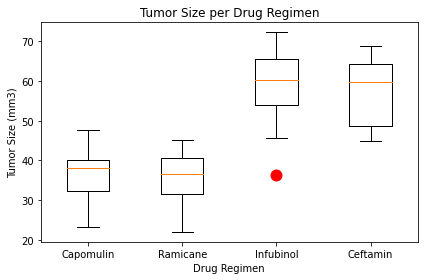

In [19]:
# Create a box plots showing the four drug regimens

# Combine the data for the different drug regimens into a single array
data = [capomulin, ramicane, infubinol, ceftamin]

# Dictionary with the formatting for outliers in the boxplot
flierprops = dict(marker='o', markerfacecolor='red', markersize=12, markeredgecolor='none')

# Create the boxplot graph
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Size per Drug Regimen')
ax1.set_ylabel('Tumor Size (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
ax1.boxplot(data, flierprops=flierprops)
plt.tight_layout()

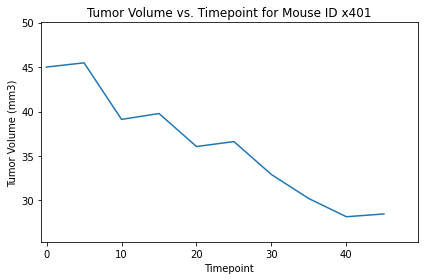

In [59]:
# Select a mouse that was treated with Capomulin and generate a line plot of tumor volume vs. time point for that mouse

# Filter clean dataframe on just Capomulin drug regimen
capomulin_df = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

# Select a sample of one from the capomulin dataframe
sample_df = capomulin_df.sample(1)

# Capture the Mouse ID from that sample line
sample_mouse_id = sample_df.iloc[0, 0]

# Using the Mouse ID, filter the original dataset to get all of the timepoints of that mouse ID.
# Sort the dataframe in ascending timepoint (earliest to latest)
single_mouse_df = clean_df[clean_df['Mouse ID'] == sample_mouse_id].sort_values('Timepoint', ascending=True)

# Plot a line graph of the Tumor Volume versus Timepoint for the selected Mouse ID
plt.plot(single_mouse_df['Timepoint'], single_mouse_df['Tumor Volume (mm3)'])
plt.title(f'Tumor Volume vs. Timepoint for Mouse ID {sample_mouse_id}')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.xlim(-.75,single_mouse_df['Timepoint'].max()*1.10)
plt.ylim(single_mouse_df['Tumor Volume (mm3)'].min()*0.90, single_mouse_df['Tumor Volume (mm3)'].max()*1.10)
plt.tight_layout()
plt.show()

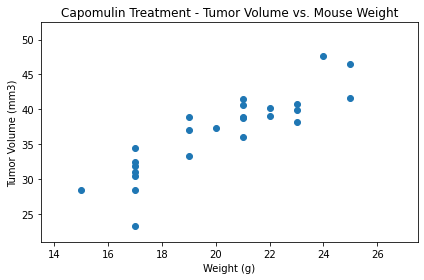

In [80]:
# Generate a scatter plot of tumor volume versus mouse weight for the Capomulin treatment regimen

# Use the dataframe created above for the tumor size for the last timepoint
# Filter that dataframe on the Capomulin treatment
cap_tum_vol = tumor_size[tumor_size['Drug Regimen'] == 'Capomulin']

# Merge the mouse weight to this dataframe using mouse ID.
cap_tum_vol_wt = pd.merge(cap_tum_vol, mouse_metadata[['Mouse ID', 'Weight (g)']], how='left', on='Mouse ID')

# Generate the scatter plot
plt.scatter(cap_tum_vol_wt['Weight (g)'], cap_tum_vol_wt['Tumor Volume (mm3)'])
plt.title('Capomulin Treatment - Tumor Volume vs. Mouse Weight')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.xlim(cap_tum_vol_wt['Weight (g)'].min()*0.90, cap_tum_vol_wt['Weight (g)'].max()*1.10)
plt.ylim(cap_tum_vol_wt['Tumor Volume (mm3)'].min()*0.90, cap_tum_vol_wt['Tumor Volume (mm3)'].max()*1.10)
plt.tight_layout()
plt.show()

In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
